In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

[9 0 0 3 0 2 7 2 5 5]


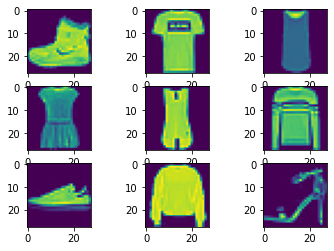

In [ ]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
for i in range(9):
  plt.subplot(330+i+1) ##3 hàng 3 cột + vị trí hiển thị 
  plt.imshow(x_train[i])
  plt.show
print(y_train[0:10])
x=x_test

In [ ]:
## biến đổi kiểu dữ liệu gán từ 0 -> 1
x_train = x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_train/=255

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)


In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential 
from keras.layers import Activation,Dropout,Dense

In [ ]:
model = Sequential()
#thêm lớp hàm ẩn 512 
model.add(Dense(512,activation='relu',input_shape=(784,)))
#độ vọt lố
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='Softmax'))
#tóm tắt
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,batch_size= 128,epochs = 50, verbose = 1, validation_data=(x_test,y_test))

Epoch 1/50
469/469 [==============================] - 11s 20ms/step - loss: 0.9038 - accuracy: 0.6668 - val_loss: 27418.2793 - val_accuracy: 0.6384
Epoch 2/50
469/469 [==============================] - 9s 20ms/step - loss: 0.5713 - accuracy: 0.7901 - val_loss: 19743.3691 - val_accuracy: 0.6707
Epoch 3/50
469/469 [==============================] - 9s 20ms/step - loss: 0.4945 - accuracy: 0.8190 - val_loss: 16360.7744 - val_accuracy: 0.7150
Epoch 4/50
469/469 [==============================] - 9s 20ms/step - loss: 0.4498 - accuracy: 0.8359 - val_loss: 17452.5000 - val_accuracy: 0.7148
Epoch 5/50
469/469 [==============================] - 9s 19ms/step - loss: 0.4196 - accuracy: 0.8470 - val_loss: 17211.9004 - val_accuracy: 0.7293
Epoch 6/50
469/469 [==============================] - 9s 19ms/step - loss: 0.3972 - accuracy: 0.8549 - val_loss: 16469.0312 - val_accuracy: 0.7478
Epoch 7/50
469/469 [==============================] - 9s 20ms/step - loss: 0.3798 - accuracy: 0.8611 - val_loss: 1775

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


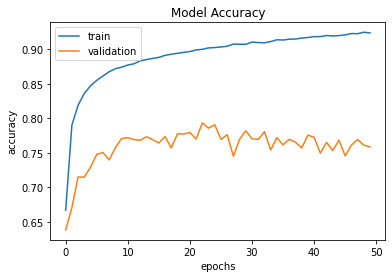

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')

In [ ]:
score=model.evaluate(x_test,y_test,verbose=1)
print('Test loss =',score[0])
print('Test accuracy =',score[1])

313/313 [==============================] - 1s 3ms/step - loss: 72721.6562 - accuracy: 0.7585
Test loss = 72721.65625
Test accuracy = 0.7584999799728394


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


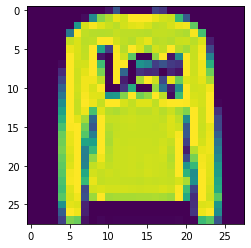

In [ ]:
import numpy as np
y_predict = model.predict(x_test)
print(y_predict[1])
plt.imshow(x[1])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('ANNmnist_shop.jpynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/ANNmnist_shop.jpynb to pdf
[NbConvertApp] Support files will be in ANNmnist_shop_files/
[NbConvertApp] Making directory ./ANNmnist_shop_files
[NbConvertApp] Making directory ./ANNmnist_shop_files
[NbConvertApp] Making directory ./ANNmnist_shop_files
[NbConvertApp] Writing 42307 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 98789 bytes to /content/drive/My Drive/ANNmnist_shop.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'